In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [330]:
data = pd.read_csv('credit_card.csv')
data

,actionnr,merchant_id,average_amount_transaction_day,transaction_amount,is_declined,total_number_of_declines_day,isforeigntransaction,ishighriskcountry,daily_chargeback_avg_amt,sixmonth_avg_chbk_amt,sixmonth_chbk_freq,isfradulent
0,1,3160040998,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,2,3160040998,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3,3160041896,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,4,3160141996,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,5,3160241992,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
3070,3071,6661273532,500.0,11000.0,Y,0,N,N,754,585.0,7,N
3071,3072,6661273532,800.0,0.0,Y,0,N,N,754,585.0,7,N
3072,3073,6661273533,800.0,20800.0,Y,0,N,N,754,585.0,7,N
3073,3074,6661273532,1500.0,12000.0,Y,0,Y,Y,754,585.0,7,N


In [331]:
df = data.copy()
print(data.describe())
print("-"*50)
print(df.info())

          actionnr   merchant_id  average_amount_transaction_day  \
count  3075.000000  3.075000e+03                     3075.000000   
mean   1538.000000  5.026634e+09                      515.026556   
std     887.820365  9.870778e+08                      291.906978   
min       1.000000  3.160041e+09                        4.011527   
25%     769.500000  4.170814e+09                      269.788047   
50%    1538.000000  5.025578e+09                      502.549575   
75%    2306.500000  5.889625e+09                      765.272803   
max    3075.000000  6.665906e+09                     2000.000000   

       transaction_amount  total_number_of_declines_day  \
count         3075.000000                   3075.000000   
mean          9876.399210                      0.957398   
std          10135.331016                      2.192391   
min              0.000000                      0.000000   
25%           2408.781147                      0.000000   
50%           6698.891856        

In [332]:
print(f"Doublons détectés :\n {data.duplicated().sum()}")
print("-"*50)
print(f"Valurs manquantes : \n{df.isnull().sum()}")


Doublons détectés :
 0
--------------------------------------------------
Valurs manquantes : 
actionnr                          0
merchant_id                       0
average_amount_transaction_day    0
transaction_amount                0
is_declined                       0
total_number_of_declines_day      0
isforeigntransaction              0
ishighriskcountry                 0
daily_chargeback_avg_amt          0
sixmonth_avg_chbk_amt             0
sixmonth_chbk_freq                0
isfradulent                       0
dtype: int64


In [333]:

print(f"Fraude counts :\n{df['isfradulent'].value_counts()}")
print("-"*50)
print(f"isforeigntransaction :\n{df['isforeigntransaction'].value_counts()}")
print("-"*50)
print(f"ishighriskcountry :\n{df['ishighriskcountry'].value_counts()}")

Fraude counts :
isfradulent
N    2627
Y     448
Name: count, dtype: int64
--------------------------------------------------
isforeigntransaction :
isforeigntransaction
N    2369
Y     706
Name: count, dtype: int64
--------------------------------------------------
ishighriskcountry :
ishighriskcountry
N    2870
Y     205
Name: count, dtype: int64


[]

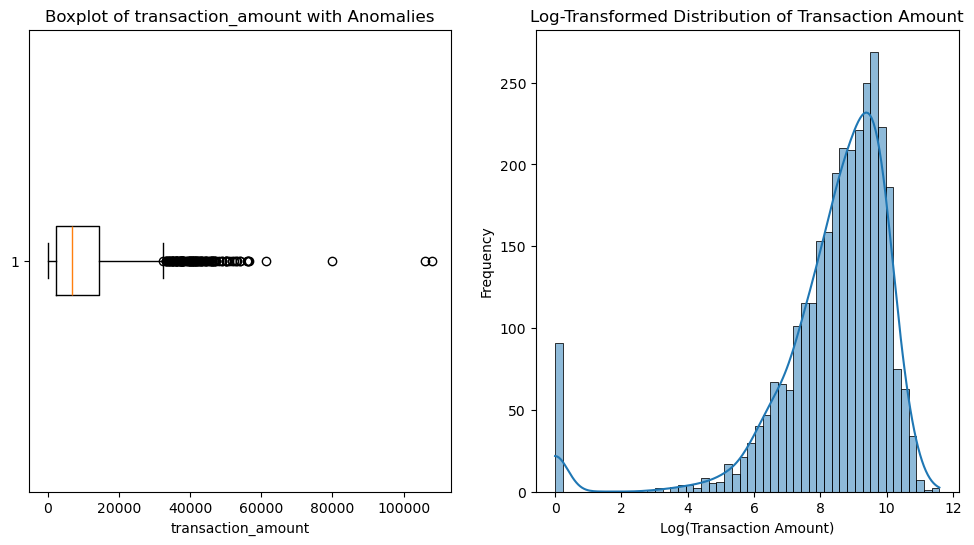

In [334]:
# detection des anomalies
def anomaly(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)


#Graphe des anomalies


plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.boxplot(df['transaction_amount'], vert=False)
plt.title('Boxplot of transaction_amount with Anomalies')
plt.xlabel('transaction_amount')
plt.plot()
# Ligne chart for trasaction amount lognplotmally distributed
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['transaction_amount']), bins=50, kde=True)
plt.title('Log-Transformed Distribution of Transaction Amount')
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Frequency')
plt.plot()




[]

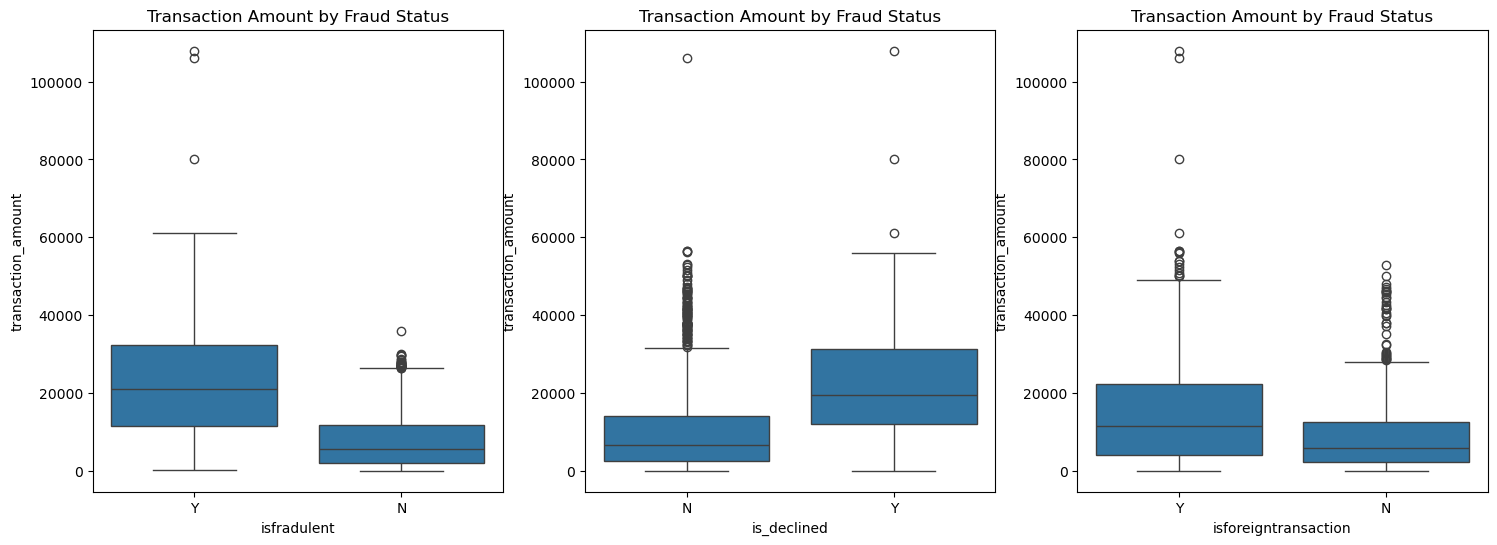

In [335]:
plt.figure(figsize=(18, 6))
# Amount transaction by isfradulent
plt.subplot(1,3,1)
sns.boxplot(x='isfradulent', y='transaction_amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('isfradulent')
plt.ylabel('transaction_amount')
plt.plot()
# Amount tansaction by is declined
plt.subplot(1,3,2)
sns.boxplot(x='is_declined', y='transaction_amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('is_declined')
plt.ylabel('transaction_amount')
plt.plot()
# Amount tansaction by is isforeigntransaction
plt.subplot(1,3,3)
sns.boxplot(x='isforeigntransaction', y='transaction_amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('isforeigntransaction')
plt.ylabel('transaction_amount')
plt.plot()

In [336]:
df.columns
df.head()

,actionnr,merchant_id,average_amount_transaction_day,transaction_amount,is_declined,total_number_of_declines_day,isforeigntransaction,ishighriskcountry,daily_chargeback_avg_amt,sixmonth_avg_chbk_amt,sixmonth_chbk_freq,isfradulent
0,1,3160040998,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,2,3160040998,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3,3160041896,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,4,3160141996,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,5,3160241992,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [337]:
# encoding des vr categorical
df['isfradulent'] = df['isfradulent'].map({'Y': 1, 'N': 0})
df['is_declined'] = df['is_declined'].map({'Y': 1, 'N': 0})
df['isforeigntransaction'] = df['isforeigntransaction'].map({'Y': 1, 'N': 0})
df['ishighriskcountry'] = df['ishighriskcountry'].map({'Y': 1, 'N': 0})
df.head(20)

,actionnr,merchant_id,average_amount_transaction_day,transaction_amount,is_declined,total_number_of_declines_day,isforeigntransaction,ishighriskcountry,daily_chargeback_avg_amt,sixmonth_avg_chbk_amt,sixmonth_chbk_freq,isfradulent
0,1,3160040998,100.000000,3000.000000,0,5,1,1,0,0.0,0,1
1,2,3160040998,100.000000,4300.000000,0,5,1,1,0,0.0,0,1
2,3,3160041896,185.500000,4823.000000,1,5,0,0,0,0.0,0,1
3,4,3160141996,185.500000,5008.500000,1,8,0,0,0,0.0,0,1
4,5,3160241992,500.000000,26000.000000,0,0,1,1,800,677.2,6,1
5,6,3160241992,500.000000,27000.000000,0,0,1,1,800,677.2,6,1
6,7,3160272997,262.500000,11287.500000,0,0,0,0,900,345.5,7,1
7,8,3162041996,185.500000,11130.000000,1,20,0,0,0,0.0,0,1
8,9,3162041996,185.500000,6121.500000,1,20,0,0,0,0.0,0,1
9,10,3162041996,185.500000,7049.000000,1,20,0,0,0,0.0,0,1


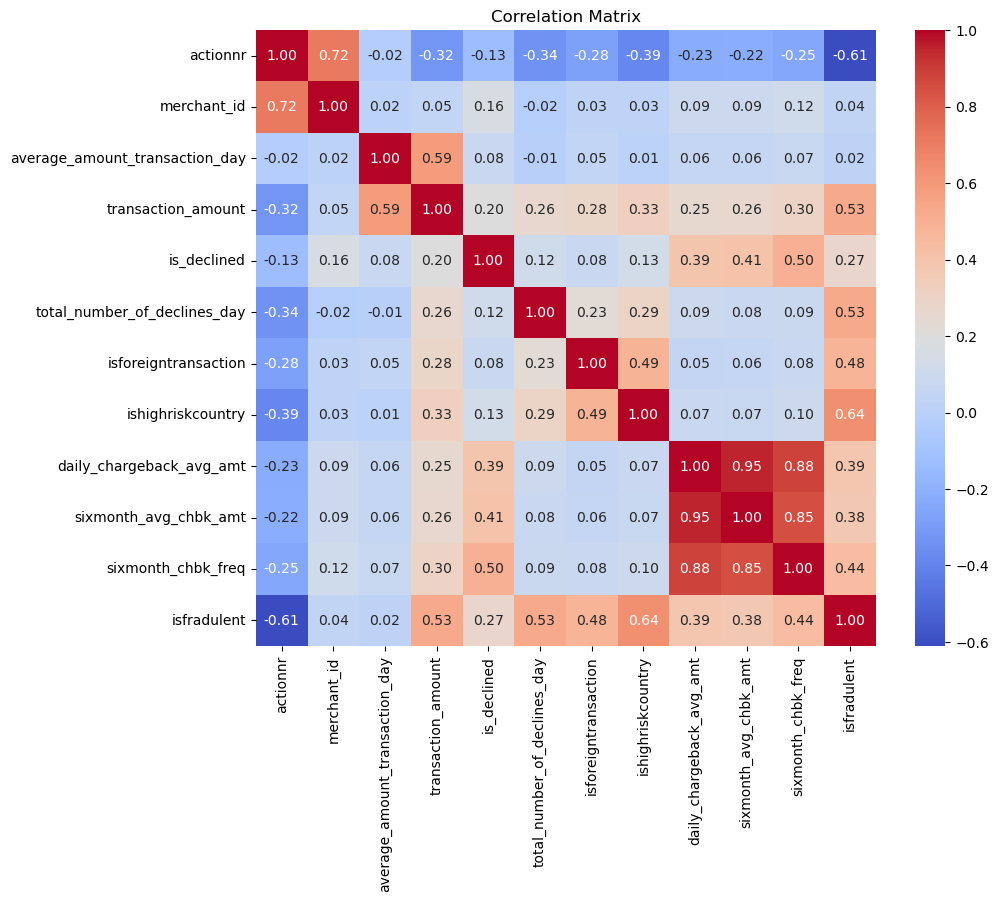

In [338]:
corr = df[['transaction_amount','total_number_of_declines_day','daily_chargeback_avg_amt','sixmonth_avg_chbk_amt','sixmonth_chbk_freq']].corr()
# Matrice de correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Models : 

In [339]:
df.dtypes
X = df[['transaction_amount', 'total_number_of_declines_day', 'daily_chargeback_avg_amt', 'sixmonth_avg_chbk_amt', 'sixmonth_chbk_freq', 'isforeigntransaction', 'ishighriskcountry', 'is_declined']]
y = df['isfradulent']

### Logistic



In [340]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
preprocessor = ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),X.columns)
    ]
)


In [341]:
pipeline = Pipeline([
    ('prep',preprocessor),
    ('clf',LogisticRegression(class_weight='balanced',max_iter=1000))]
)

In [342]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['transaction_amount', 'total_number_of_declines_day',
       'daily_chargeback_avg_amt', 'sixmonth_avg_chbk_amt',
       'sixmonth_chbk_freq', 'isforeigntransaction', 'ishighriskcountry',
       'is_declined'],
      dtype='object'))])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [343]:
y_pred = pipeline.predict(X_test)


In [344]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[763  26]
 [  8 126]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       789
           1       0.83      0.94      0.88       134

    accuracy                           0.96       923
   macro avg       0.91      0.95      0.93       923
weighted avg       0.97      0.96      0.96       923



In [345]:
pipeline.score(X_test, y_test)

0.9631635969664138

## RandomForest


In [346]:
from sklearn.ensemble import RandomForestClassifier
pipelineRandomForest = Pipeline([
    ('prep',preprocessor),
    ('clf',RandomForestClassifier(random_state=42, class_weight='balanced'))]
)
pipelineRandomForest.fit(X_train, y_train)
y_pred = pipelineRandomForest.predict(X_test)

In [347]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
pipelineRandomForest.score(X_test, y_test)

Confusion Matrix:
[[782   7]
 [ 11 123]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       789
           1       0.95      0.92      0.93       134

    accuracy                           0.98       923
   macro avg       0.97      0.95      0.96       923
weighted avg       0.98      0.98      0.98       923



0.980498374864572

In [348]:
#Test sans faire pipeline
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

In [349]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
rf_classifier.score(X_test, y_test)

Confusion Matrix:
[[780   9]
 [ 11 123]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       789
           1       0.93      0.92      0.92       134

    accuracy                           0.98       923
   macro avg       0.96      0.95      0.96       923
weighted avg       0.98      0.98      0.98       923



0.9783315276273022

## SVM

In [350]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

In [351]:
svm_classifier = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
svm_classifier.score(X_test, y_test)

Confusion Matrix:
[[651 138]
 [ 42  92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       789
           1       0.40      0.69      0.51       134

    accuracy                           0.80       923
   macro avg       0.67      0.76      0.69       923
weighted avg       0.86      0.80      0.82       923



0.8049837486457205

In [352]:
DecisionBoundaryDisplay.from_estimator(
    svm_classifier,
    X_train,
    response_method="predict",
    xlabel="Feature 1",
    ylabel="Feature 2",
    alpha=0.5
)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor='k', s=20)
plt.show()

ValueError: n_features must be equal to 2. Got 8 instead.